# Final Project
Building upon and analyzing a _real_ network!

## Final Project Guidelines
For your final project, your team will be asked to complete the following tasks
* Learn about the network dataset you've been assigned
* Create an adjacency matrix for your matrix using your `.csv` file
* Plot your network
* Find the most central node in your network using one centrality metric
* Find and plot the communities in your network
* Interpret your findings!

Here are a few things to get you started. Don't forget that you have the cheat sheet to help you as well!

_Hint: the `Analyzing_Networks.ipynb` file we went through today will be very helpful, too!_

## Teaching Team: Code Good Network

**PUT YOUR TEAM NAME HERE**

And write a description/introduction to your specific dataset


### Import your libraries
In the below code section, import the libraries you'll use.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

### Read in the adjacency matrix
Your team has been sent a unique `.csv` file!

In [2]:
folder = ""
file = "CodeGoodNetwork"
ext = ".csv"
CG_Adjacency = np.genfromtxt(folder+file+ext, dtype=int, delimiter=',', skip_header=False)

### Read in the ID_key
The file containing the ID keys (which name corresponds to which index in the adjacency matrix) is called `ID_key.csv`.

In [3]:
folder = ""
file = "ID_key"
ext = ".csv"
ID_keys = np.genfromtxt(folder+file+ext, dtype=str, delimiter=',', skip_header=False)

### Turn your adjacancy matrix into a network object

In [4]:
CG_Network = nx.from_numpy_matrix(CG_Adjacency)

#### Plot your network
Use `nx.spring_layout()` and `nx.draw()` to plot your network.

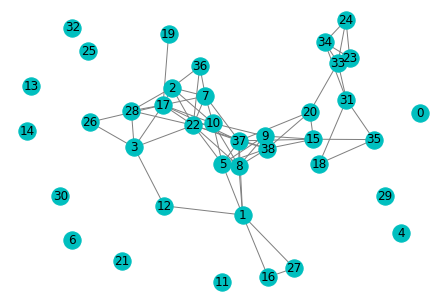

In [5]:
pos = nx.spring_layout(CG_Network, k=0.55)
nx.draw(CG_Network, pos, node_color='c', node_size=300, edge_color='grey', with_labels=True)

### Centrality
Use one centrality measure to find the "most central" node in the network.
Interpret what "most central" means in this case (it depends on which one you're using!), and use the `ID_keys` array to identify the name of the most central node. 

In [6]:
a = nx.degree_centrality(CG_Network)
b = nx.eigenvector_centrality(CG_Network)
c = nx.betweenness_centrality(CG_Network)

max_a_node = max(a, key=lambda key: a[key])
max_b_node = max(b, key=lambda key: b[key])
max_c_node = max(c, key=lambda key: c[key])

print('The person with highest degree centrality is', ID_keys[max_a_node])
print('The person with highest eigenvector centrality is', ID_keys[max_b_node])
print('The person with highest betweenness centrality is', ID_keys[max_c_node])

The person with highest degree centrality is Nicholas Hong
The person with highest eigenvector centrality is Nicholas Hong
The person with highest betweenness centrality is Zara Ahmed


Now, plot the network again using a different color for the node you found above.

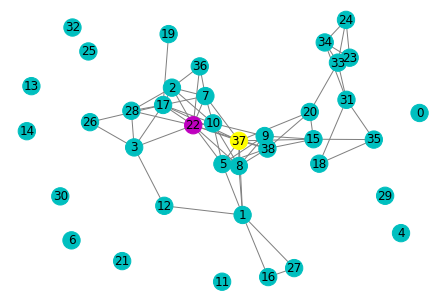

In [7]:
colors = ['c']*len(CG_Adjacency)
colors[max_a_node] = 'm'
colors[max_b_node] = 'm'
colors[max_c_node] = 'yellow'
nx.draw(CG_Network, pos, node_color=colors, node_size=300, edge_color='grey', with_labels=True)

**Double click this** to edit this text. Use this area to interpret what you learned. Press `Shift+Enter` when you're done editing.

### Clustering coefficient
(Optional, but why not!)

Use the `nx.algorithms.clustering()` function we learned today to find the node with the minimum clustering coefficient. 

In [8]:
clustering = nx.algorithms.clustering(CG_Network)
print('The node with lowest clustering coefficient is node', min(clustering, key=lambda key: clustering[key]))

average_cc = nx.algorithms.average_clustering(CG_Network)
print('The average clustering coefficient for the CG network is ', average_cc)

The node with lowest clustering coefficient is node 0
The average clustering coefficient for the CG network is  0.41752136752136754


Now, plot the network again using a different color for the node you found above.

**Double click this** to edit this text. Use this area to interpret what you learned. Press `Shift+Enter` when you're done editing.

### Find communities
Use the `community.girvan_newman()` function to find communities in your network and plot the different communities with different colors. The `Plot_Comm` function from today's notebook has been copied and pasted below. Make sure you plot the network in the same positioning as you did above.

_Remember, you'll have to import an extra package to use the `community.girvan_newman()` function. Check out the cheat sheet if you need help_

In [12]:
import matplotlib.cm as cmx

def Plot_Comm(Network, A, position = 0):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(A)
    color_map = ['k']*N
    for i in range(len(A)):
        for j in range(len(A[i])):
            color_map[ A[i][j] ] = cmap(i/K)
    if position == 0:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=300, edge_color='grey', with_labels=True)
    plt.show()
    return

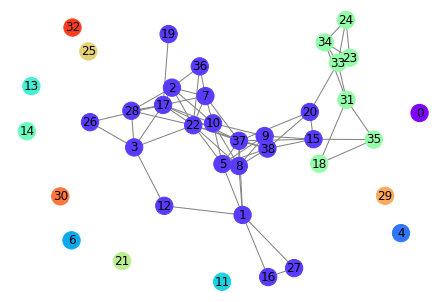

In [13]:
CG_Comm = community.girvan_newman(CG_Network)
communities = tuple(sorted(c) for c in next(CG_Comm))
Plot_Comm(CG_Network, communities, pos)

In [24]:
ID_keys[23]

'Nilofar'

In [25]:
sum(CG_Adjacency[22, :])

12

**Double click this** to edit this text. Use this area to interpret what communities you found. Did any of them surprise you? Press `Shift+Enter` when you're done editing.

### Interpret what you learned

Use this space to interpret what you learned by analyzing your network! Don't worry, there are no wrong answers. Feel free to be as creative as you'd like. If you had more tools from Network Science, what would you like to study about this network? What other networks do you wish you had data for so you could learn more about them? 

**Double click this** to edit this text. Press `Shift+Enter` when you're done editing.